In [132]:
import torch
import torch.nn as nn
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, load_diabetes

In [4]:
from torch.utils.data import Dataset, DataLoader

In [207]:
class Data(Dataset):
    
    def __init__(self):
        self.x, self.y = self.load_data()
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
    
    def load_data(self):
        data = load_diabetes()
        x = torch.from_numpy(data.data)
        y = torch.from_numpy(data.target)
        x = x.type(torch.float32)
        y = y.type(torch.float32)
        return x, y


In [225]:
data = load_diabetes()

In [226]:
x = torch.from_numpy(data.data)
y = torch.from_numpy(data.target)

In [227]:
x = x.type(torch.float32)
y = y.type(torch.float32)

In [228]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442])


In [229]:
y = y.view(-1, 1)

In [230]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442, 1])


In [231]:
x_train, y_train, x_test, y_test = x[:400], y[:400], x[400:], y[400:]

In [232]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([400, 10]) torch.Size([400, 1]) torch.Size([42, 10]) torch.Size([42, 1])


In [248]:
# initialie the weights and bias
w = torch.randn((x.size()[1], 1), requires_grad=True)
b = torch.randn(y.size()[1], requires_grad=True)

IndexError: tuple index out of range

In [ ]:
print(w.shape, b.shape)

In [ ]:
def forward(x):
    return x@w + b

def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [219]:
Loss = []
max_itr = 5000
lr = 0.1
for epoch in range(max_itr):
    
    #
    y_pred = forward(x_train)
    
    # calculate the loss
    loss = mse(y_train, y_pred)
    
    # backpropagate  loss
    loss.backward()
    
    Loss.append(loss.item())
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

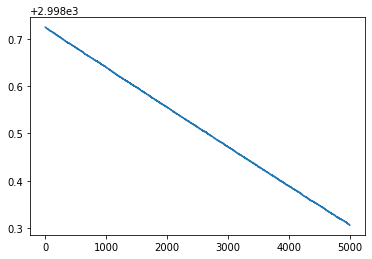

In [220]:
plt.plot(Loss);

In [221]:
forward(x)[:5]

tensor([[204.1671],
        [ 70.1500],
        [176.3946],
        [163.8973],
        [127.9669]], grad_fn=<SliceBackward>)

In [222]:
y[:5]

tensor([[151.],
        [ 75.],
        [141.],
        [206.],
        [135.]])

In [244]:
dataset =  Data()

In [245]:
train_dl = DataLoader(dataset=dataset, batch_size=16, shuffle=True)

In [250]:
Loss = []
max_itr = 1000
lr = 0.01
for epoch in range(max_itr):
    for x, y  in train_dl:
        y_pred = forward(x)

        # calculate the loss
        loss = mse(y, y_pred)

        # backpropagate  loss
        loss.backward()

        Loss.append(loss.item())
        with torch.no_grad():
            w -= lr*w.grad
            b -= lr*b.grad
            w.grad.zero_()
            b.grad.zero_()

In [253]:
# plt.plot(Loss)

In [255]:
# forward(x)[:5]

In [332]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.randn(1000, 1)
        e = torch.rand(1000, 1)
        self.y = 3*self.x + 0.3*e + 1
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
        

In [333]:
dataset = Data()

In [334]:
x = dataset.x
y = dataset.y

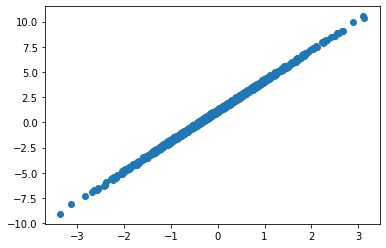

In [335]:
plt.scatter(x.numpy(), y.numpy());

In [336]:
class LR(torch.nn.Module): 
  
    def __init__(self): 
        super(LR, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  

In [337]:
model = LR()

In [338]:
def  plot():
    plt.scatter(dataset.x.numpy(), dataset.y.numpy());
    plt.plot(x.numpy(), model.forward(x).detach().numpy(), c='red')

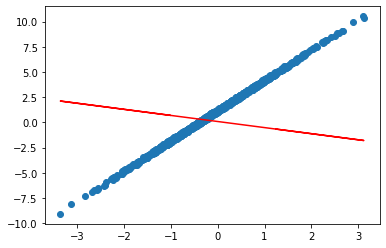

In [339]:
plot()

In [340]:
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

/home/macab/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [341]:
Loss = []
for epoch in range(500): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = model(x) 
  
    # Compute and print loss 
    loss = criterion(pred_y, y) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    Loss.append(loss.item())

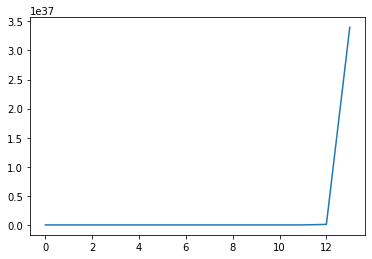

In [342]:
plt.plot(Loss)

In [331]:
Loss

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [352]:
x_data = Variable(torch.randn(100, 1)) 
y_data = Variable(2*x_data + 0.5) 
  
  
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  
# our model 
our_model = LinearRegressionModel() 
  
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.0001) 
  
Loss = []
for epoch in range(500): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = our_model(x_data) 
  
    # Compute and print loss 
    loss = criterion(pred_y, y_data) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    Loss.append(loss.item())
    print('epoch {}, loss {}'.format(epoch, Loss[epoch])) 
  


epoch 0, loss 868.0128784179688
epoch 1, loss 829.9917602539062
epoch 2, loss 793.6378173828125
epoch 3, loss 758.8778076171875
epoch 4, loss 725.6419067382812
epoch 5, loss 693.8631591796875
epoch 6, loss 663.4775390625
epoch 7, loss 634.424072265625
epoch 8, loss 606.6442260742188
epoch 9, loss 580.0821533203125
epoch 10, loss 554.684326171875
epoch 11, loss 530.3997802734375
epoch 12, loss 507.1796569824219
epoch 13, loss 484.9772033691406
epoch 14, loss 463.747802734375
epoch 15, loss 443.44879150390625
epoch 16, loss 424.039306640625
epoch 17, loss 405.4803466796875
epoch 18, loss 387.7346496582031
epoch 19, loss 370.7665100097656
epoch 20, loss 354.54180908203125
epoch 21, loss 339.0279541015625
epoch 22, loss 324.1937561035156
epoch 23, loss 310.00946044921875
epoch 24, loss 296.446533203125
epoch 25, loss 283.4776916503906
epoch 26, loss 271.07696533203125
epoch 27, loss 259.2193603515625
epoch 28, loss 247.881103515625
epoch 29, loss 237.0394287109375
epoch 30, loss 226.672546

epoch 266, loss 0.006837101187556982
epoch 267, loss 0.006548750679939985
epoch 268, loss 0.0062725781463086605
epoch 269, loss 0.006008035968989134
epoch 270, loss 0.005754783283919096
epoch 271, loss 0.005512414965778589
epoch 272, loss 0.005280179437249899
epoch 273, loss 0.005057841539382935
epoch 274, loss 0.0048449537716805935
epoch 275, loss 0.00464103277772665
epoch 276, loss 0.0044457269832491875
epoch 277, loss 0.00425872253254056
epoch 278, loss 0.004079720471054316
epoch 279, loss 0.003908307291567326
epoch 280, loss 0.003744065063074231
epoch 281, loss 0.003586752340197563
epoch 282, loss 0.003436172613874078
epoch 283, loss 0.0032919549848884344
epoch 284, loss 0.003153763012960553
epoch 285, loss 0.003021538257598877
epoch 286, loss 0.0028947482351213694
epoch 287, loss 0.002773423446342349
epoch 288, loss 0.002657229546457529
epoch 289, loss 0.0025458489544689655
epoch 290, loss 0.002439160831272602
epoch 291, loss 0.002337029902264476
epoch 292, loss 0.0022391520906239

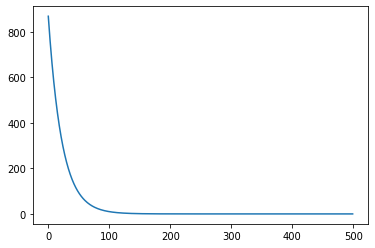

In [354]:
plt.plot(Loss)